In [536]:
import numpy as np
from scipy import optimize
from matplotlib import patches
import time

# Hamiltonian
Consider only a pair of spin, we have
$$
H = J \mathbf{S}_1 \cdot \mathbf{S}_2 - \mu_B (\mathbf{S}_1 + \mathbf{S}_2) \cdot \mathbf{B} + D(S_{1D}^2 + S_{1D}^2)
$$
where $J > 0$ for antiferromagnetic interaction, and $D<0$ for easy axis.

The ground state energy at zero field is
$$
E = -JS^2 + 2DS
$$

## $\mathsf{B}$ perpendicular to spin
Assume the mirror plane symmetry, the angle between both spins and easy axis is $\theta$.

The energy is
$$
E = - JS^2 \cos 2\theta - 2\mu_BSB\sin\theta + 2DS^2\cos^2\theta
$$
The total momentum is
$$
M = 2\mu_BS\sin\theta
$$
To minimize the energy, we need to solve
$$
dE/d\theta = 2JS^2\sin 2\theta - 2\mu_BSB\cos\theta - 2DS\sin\theta = 0
$$
which does not have a simple closed-form solution. Therefore we hunt for a numeric solution, assuming
$$
S = 1, J = 1, D = -1, \mu_B = 1
$$

In [342]:
def E_perp(x, S, mu_B, J, D, B):
    E = -J*S**2*np.cos(2*x) - 2*mu_B*S*B*np.sin(x) + 2*D*S**2*np.cos(x)**2
    return E

In [343]:
S = 1
J = 1 # meV
D = -1 # meV
mu_B = 5.7884e-2 # meV / T

In [350]:
E_perp(0, S, mu_B, J, 0, 0)

-1.0

In [396]:
# Ds = -np.array([0.0, 0.1, 0.2, 0.5])
S = 1/2
mu_B = 5.7884e-2 # meV / T
J = 0.5 # meV
Ds = -np.array([0, 0.1, 0.2])
Bs = np.linspace(0, 16, 50)
E_BD = []
theta_BD = []

bounds = [[0, np.pi/2]]
x0 = [0]

start_time = time.time()

for D in Ds:
    E_B = []
    theta_B = []
    for B in Bs:
        args = (S, mu_B, J, D, B)
        result = optimize.dual_annealing(E_perp, bounds=bounds, x0=x0, args=args)
        theta = result.x[0]
        E_B.append(result.fun)
        theta_B.append(theta)
    E_BD.append(E_B)
    theta_BD.append(theta_B)
E_BD = np.array(E_BD)
theta_BD = np.array(theta_BD)

elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 16.747s.


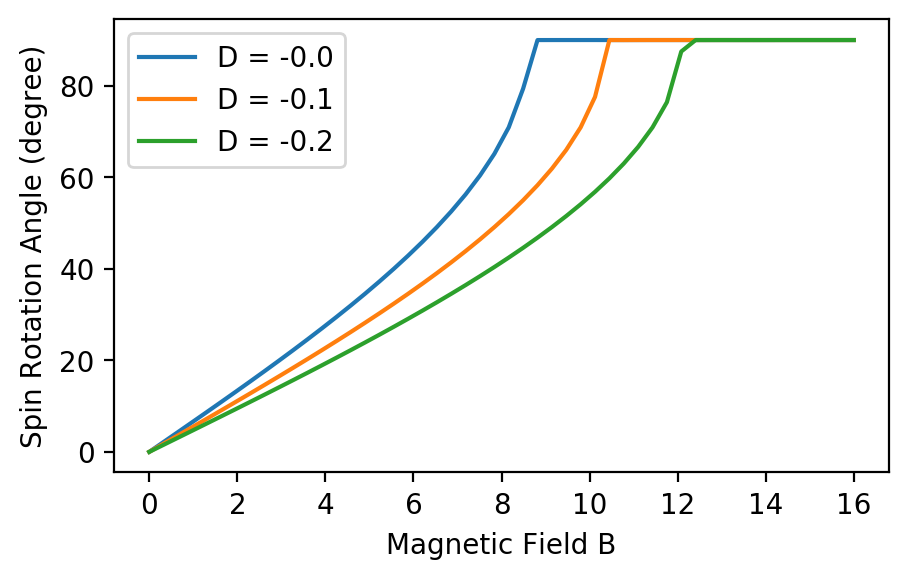

In [397]:
plt.figure(figsize=(5,3), dpi = 200)
thetas_deg = theta_BD/np.pi*180
for theta_deg in thetas_deg: 
    plt.plot(Bs, theta_deg)
plt.xlabel("Magnetic Field B")
plt.ylabel("Spin Rotation Angle (degree)")
plt.legend([f"D = {D}" for D in Ds])
plt.show()

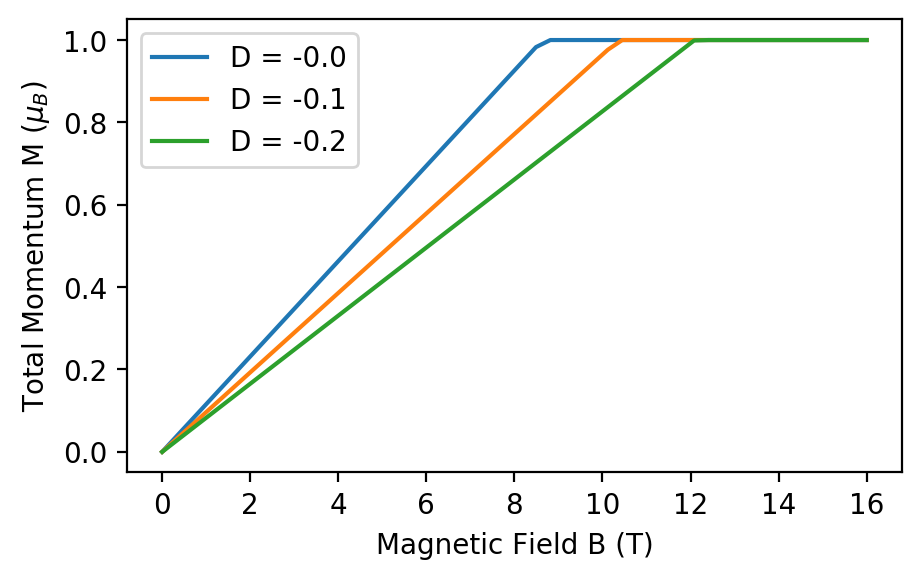

In [398]:
plt.figure(figsize=(5,3), dpi = 200)
Ms = 2*S*np.sin(theta_BD)
for M in Ms:
    plt.plot(Bs, M)
plt.xlabel("Magnetic Field B (T)")
plt.ylabel("Total Momentum M ($\mu_B$)")
plt.legend([f"D = {D}" for D in Ds])
plt.show()

## $\mathsf{B}$ parallel to spin
The angle between the spins and easy axis is $\alpha$ and $\beta$.

The energy is
$$
E = - JS^2 \cos(\beta - \alpha) - 2\mu_BSB(\cos\alpha - \cos\beta) + 2DS^2(\cos^2\alpha + \cos^2\beta)
$$
The total momentum is
$$
M = \mu_BS(\cos\alpha - \cos\beta)
$$
To minimize the energy, we use the annealing algorithm, assuming
$$
S = 1, J = 1, D = -1, \mu_B = 1
$$

In [302]:
def E_xy(xy, S, mu_B, J, D, B):
    x, y = xy
    E = -J*S**2*np.cos(y - x) - 2*mu_B*S*B*(np.cos(x) - np.cos(y)) + 2*D*S**2*(np.cos(x)**2 + np.cos(y)**2)
    return E

def M_xy(xy, S, mu_B):
    x, y = xy
    M = mu_B*S*(np.cos(x) - np.cos(y))
    return M

In [167]:
S, mu_B, J, D, B

(1, 1, 1, -6.0, 10.0)

In [327]:
bounds = [[0, np.pi/2], [0, np.pi]]
x0 = [0, 0]

args = (S, mu_B, J, 0.1, 0.1)
# start_time = time.time()
result = optimize.dual_annealing(E_xy, bounds=bounds, x0=x0, args=args)
# elapsed_time = time.time() - start_time
# print("Time consuming: {0:.3f}s.".format(elapsed_time))

In [328]:
result.fun

-1.0166666666666022

In [329]:
result.x

array([1.4873659 , 1.65422599])

In [339]:
S = 1
J = 1
mu_B = 1
Ds = -np.array([0.0, 0.1, 0.2, 0.5])
# Ds = -np.array([0.5])
Bs = np.linspace(0, 2, 100)
E_BD = []
alpha_BD = []
beta_BD = []

bounds = [[0, np.pi/2], [0, np.pi]]
x0 = [0, 0]

for D in Ds:
    E_B = []
    alpha_B = []
    beta_B = []
    for B in Bs:
        args = (S, mu_B, J, D, B)
        result = optimize.dual_annealing(E_xy, bounds=bounds, x0=x0, args=args)
        alpha, beta = result.x
        E_B.append(result.fun)
        alpha_B.append(alpha)
        beta_B.append(beta)
    E_BD.append(E_B)
    alpha_BD.append(alpha_B)
    beta_BD.append(beta_B)
E_BD = np.array(E_BD)
alpha_BD = np.array(alpha_BD)
beta_BD = np.array(beta_BD)

In [340]:
M_BD = []
for a, b in zip(alpha_BD, beta_BD):
    M_BD.append(M_xy((a, b), S, mu_B))

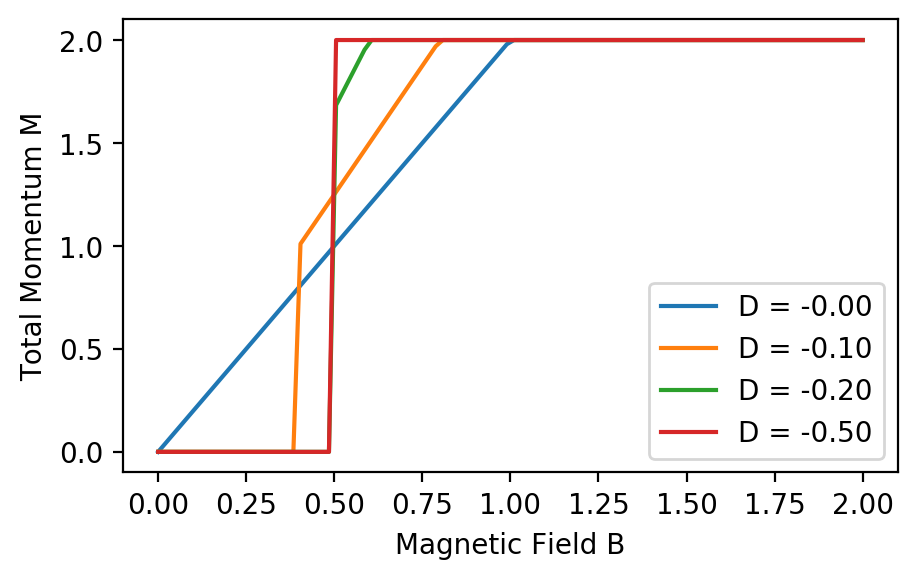

In [341]:
plt.figure(figsize=(5,3), dpi = 200)
for M in M_BD:
    plt.plot(Bs, M)
plt.xlabel("Magnetic Field B")
plt.ylabel("Total Momentum M")
plt.legend([f"D = {D:.2f}" for D in Ds])
plt.show()

# Arbitary Angle Between B and Easy Axis ($\theta$)

In [612]:
def E_theta(angles, theta, S, mu_B, J, D, B0):
    alpha, beta = angles
    S1 = np.array([S * np.cos(alpha), S * np.sin(alpha)])
    S2 = np.array([-S * np.cos(beta), -S * np.sin(beta)])
    B = np.array([B0 * np.cos(theta), B0 * np.sin(theta)])
    E = J*np.dot(S1, S2) - 2*mu_B*np.dot(B, S1+S2) + D*(S1[0]**2 + S2[0]**2)
    return E

def M_theta(angles, S, mu_B):
    alpha, beta = angles
    S1 = np.array([S * np.cos(alpha), S * np.sin(alpha)])
    S2 = np.array([-S * np.cos(beta), -S * np.sin(beta)])
    M = S1+S2
    return M

In [422]:
S = 1/2
J = 0.5 # meV
D = -0.1 # meV
mu_B = 5.7884e-2 # meV / T
B0 = 10
theta = 0
E_theta((0, 0.1), theta, S, mu_B, J, D, B0)

-0.17701814185323633

In [670]:
bounds = [[-np.pi/2, np.pi/2], [0, 2*np.pi]]
x0 = [0, 0]

S = 1/2
mu_B = 5.7884e-2 # meV / T
J = 0.5 # meV
D = -0.1 # meV
B0 = 1.0 # T
theta = np.pi/6

args = (theta, S, mu_B, J, D, B0)
start_time = time.time()
result = optimize.dual_annealing(E_theta, bounds=bounds, x0=x0, args=args)
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 0.242s.


In [671]:
alpha, beta = result.x

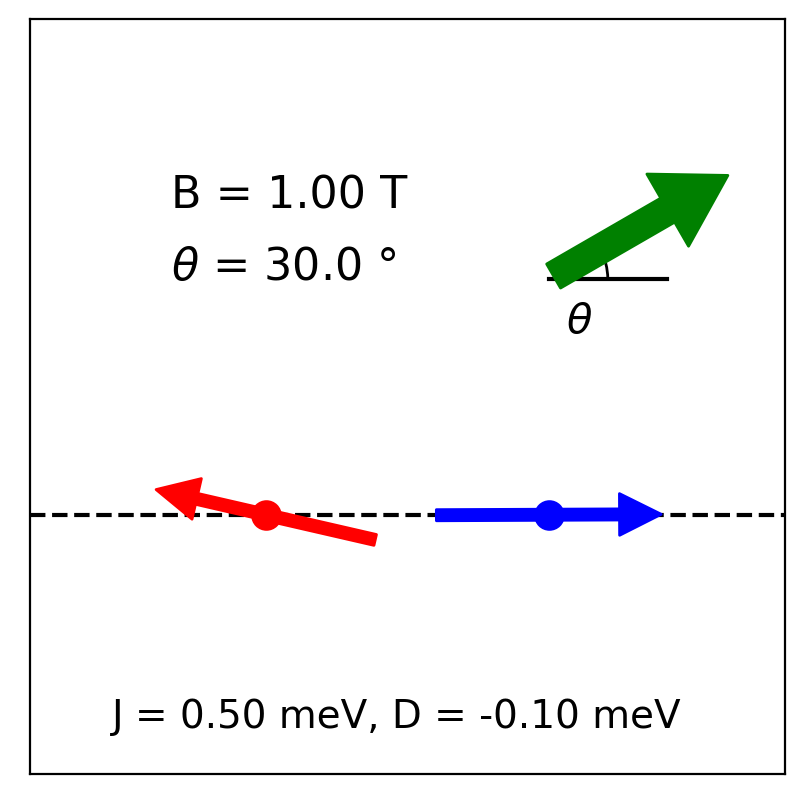

In [672]:
plt.figure(figsize=(5,5), dpi = 200)
plt.gca().set_aspect('equal')
opt1 = dict(color='b', 
            arrowstyle = 'simple,head_width=.75,head_length=.75',
            connectionstyle = 'arc3,rad=0')
opt2 = dict(color='r', 
            arrowstyle = 'simple,head_width=.75,head_length=.75',
            connectionstyle = 'arc3,rad=0')
opt3 = dict(color='g', 
            arrowstyle = 'simple,head_width=.60,head_length=.50',
            connectionstyle = 'arc3,rad=0')
xy1 = np.array([np.cos(alpha), np.sin(alpha)])
xy2 = -np.array([np.cos(beta), np.sin(beta)])
xy3 = np.array([np.cos(theta), np.sin(theta)]) * 1.8
offset1, offset2 = np.array([1.2,0]), np.array([-1.2,0])
offset3 = np.array([1.2,2])
plt.plot([-3.2,3.2], [0,0], '--', color = 'k')
plt.annotate('', xy = xy1 + offset1, xytext = - xy1 + offset1, arrowprops=opt1, size=20)
plt.annotate('', xy = xy2 + offset2, xytext = - xy2 + offset2, arrowprops=opt2, size=20)
plt.annotate('', xy = xy3 + offset3, xytext = offset3,textcoords = 'data', arrowprops=opt3, size=50)
plt.plot([offset3[0], offset3[0]+1], [offset3[1], offset3[1]], color = 'k')
arc_B = patches.Arc(offset3, 1, 1, 0, theta1 = 0, theta2 = theta / np.pi * 180)
plt.gca().add_patch(arc_B)
plt.text(offset3[0]+0.15, offset3[1]-0.45, "$\\theta$", fontsize = 15)
plt.scatter(offset1[0], offset1[1], color = 'b', s = 100)
plt.scatter(offset2[0], offset2[1], color = 'r', s = 100)

# texts
plt.text(-2, 2.6, f"B = {B0:.2f} T", fontsize = 16)
plt.text(-2, 2.0, f"$\\theta$ = {theta/np.pi*180:.1f} °", fontsize = 16)
plt.text(-2.5, -1.8, f"J = {J:.2f} meV, D = {D:.2f} meV", fontsize = 14)

plt.xlim(-3.2, 3.2)
plt.ylim(-2.2, 4.2)
# plt.axis("off")
plt.xticks([])
plt.yticks([])
plt.show()

In [618]:
def draw(angles, theta, S, J, D, B0, SAVEPATH = False, i = False, show = True):
    # unpack
    alpha, beta = angles
    
    # plot
    plt.figure(figsize=(5,5), dpi = 200)
    plt.gca().set_aspect('equal')
    opt1 = dict(color='b', 
                arrowstyle = 'simple,head_width=.75,head_length=.75',
                connectionstyle = 'arc3,rad=0')
    opt2 = dict(color='r', 
                arrowstyle = 'simple,head_width=.75,head_length=.75',
                connectionstyle = 'arc3,rad=0')
    opt3 = dict(color='g', 
                arrowstyle = 'simple,head_width=.60,head_length=.50',
                connectionstyle = 'arc3,rad=0')
    xy1 = np.array([np.cos(alpha), np.sin(alpha)])
    xy2 = -np.array([np.cos(beta), np.sin(beta)])
    xy3 = np.array([np.cos(theta), np.sin(theta)]) * 1.8
    offset1, offset2 = np.array([1.2,0]), np.array([-1.2,0])
    offset3 = np.array([1.2,2])
    plt.plot([-3.2,3.2], [0,0], '--', color = 'k')
    plt.annotate('', xy = xy1 + offset1, xytext = - xy1 + offset1, arrowprops=opt1, size=20)
    plt.annotate('', xy = xy2 + offset2, xytext = - xy2 + offset2, arrowprops=opt2, size=20)
    plt.annotate('', xy = xy3 + offset3, xytext = offset3,textcoords = 'data', arrowprops=opt3, size=50)
    plt.plot([offset3[0], offset3[0]+1], [offset3[1], offset3[1]], color = 'k')
    arc_B = patches.Arc(offset3, 1, 1, 0, theta1 = 0, theta2 = theta / np.pi * 180)
    plt.gca().add_patch(arc_B)
    plt.text(offset3[0]+0.15, offset3[1]-0.45, "$\\theta$", fontsize = 15)
    plt.scatter(offset1[0], offset1[1], color = 'b', s = 100)
    plt.scatter(offset2[0], offset2[1], color = 'r', s = 100)

    # texts
    plt.text(-2, 2.6, f"B = {B0:.2f} T", fontsize = 16)
    plt.text(-2, 2.0, f"$\\theta$ = {theta/np.pi*180:.1f} °", fontsize = 16)
    plt.text(-2, -1.8, f"J = {J:.2f} meV, D = {D:.2f} meV", fontsize = 14)

    plt.xlim(-3.2, 3.2)
    plt.ylim(-2.2, 4.2)
    # plt.axis("off")
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    if SAVEPATH:
        plt.savefig(SAVEPATH + "/" + str(i).zfill(3) + ".png")
    if show:
        plt.show()
    else:
        plt.close()

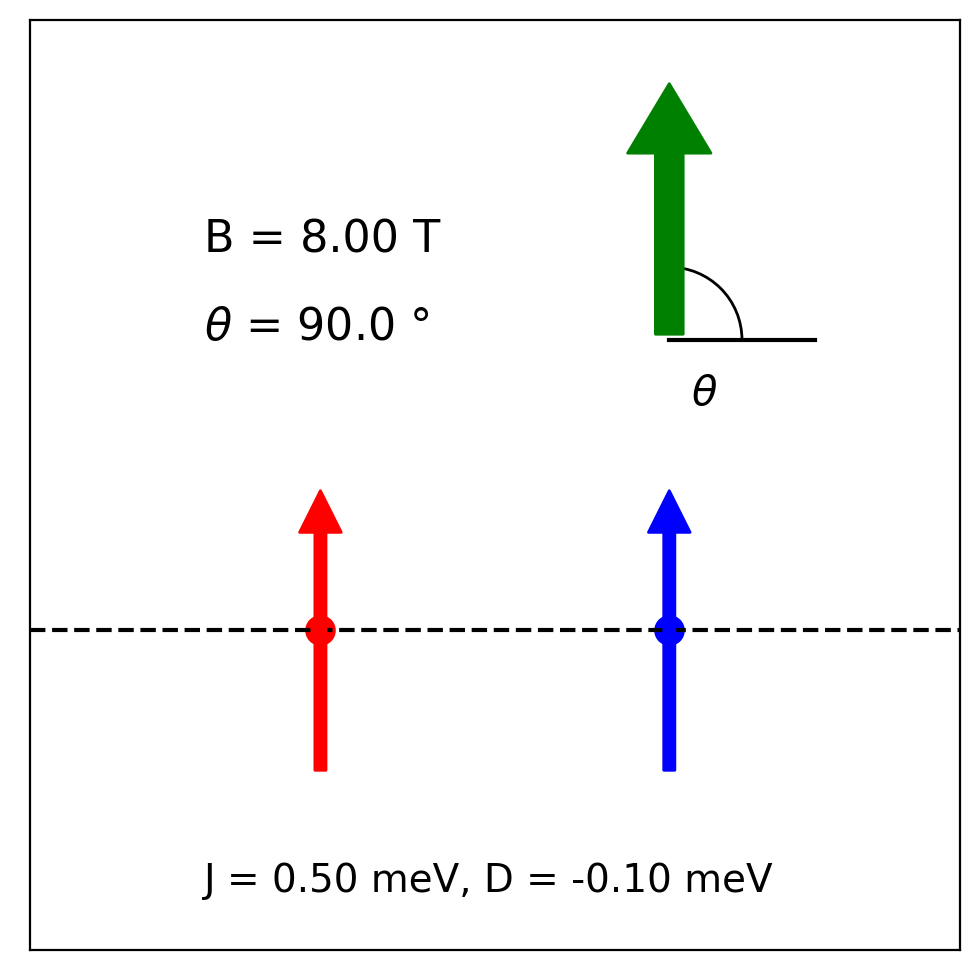

In [619]:
draw((alpha, beta), theta, S, J, D, B0, SAVEPATH = False, show = True)

## Generate Animations

In [714]:
start_time = time.time()

bounds = [[-np.pi/2, np.pi/2], [-np.pi, 0]]
x0 = [0, 0]

S = 1/2
mu_B = 5.7884e-2 # meV / T
J = 0.5 # meV
D = -0.2 # meV
theta = np.pi/6

B0s = np.linspace(0,7,161)
i = 0
for B0 in B0s:
    args = (theta, S, mu_B, J, D, B0)
    result = optimize.dual_annealing(E_theta, bounds=bounds, x0=x0, args=args)
    alpha, beta = result.x
    draw((alpha, beta), theta, S, J, D, B0, SAVEPATH = "./MB_movie_temp", i = i, show = False)
    i = i + 1
    
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 53.073s.


In [644]:
start_time = time.time()

bounds = [[0, np.pi/2], [0, 2*np.pi]]
x0 = [0, 0]

S = 1/2
mu_B = 5.7884e-2 # meV / T
J = 0.5 # meV
D = -0.1 # meV
theta = 0

B0s = np.linspace(0,6,161)
i = 0
for B0 in B0s:
    args = (theta, S, mu_B, J, D, B0)
    result = optimize.dual_annealing(E_theta, bounds=bounds, x0=x0, args=args)
    alpha, beta = result.x
    draw((alpha, beta), theta, S, J, D, B0, SAVEPATH = "./MB_movie_temp", i = i, show = False)
    i = i + 1
    
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 53.613s.


In [738]:
start_time = time.time()

bounds = [[-np.pi/2, np.pi/36], [0, 2*np.pi]]
x0 = [0, 0]

S = 1/2
mu_B = 5.7884e-2 # meV / T
J = 0.5 # meV
D = -0.1 # meV
theta = np.pi/36

B0s = np.linspace(0,5,251)
i = 0
for B0 in B0s:
    args = (theta, S, mu_B, J, D, B0)
    result = optimize.dual_annealing(E_theta, bounds=bounds, x0=x0, args=args)
    alpha, beta = result.x
    draw((alpha, beta), theta, S, J, D, B0, SAVEPATH = "./MB_movie_temp", i = i, show = False)
    i = i + 1
    
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 97.216s.


In [1087]:
start_time = time.time()

bounds = [[-np.pi/2, np.pi/18], [0, 2*np.pi]]
x0 = [0, 0]

S = 1/2
mu_B = 5.7884e-2 # meV / T
J = 0.5 # meV
D = -0.1 # meV
theta = np.pi/18

B0s = np.linspace(0,5,251)
i = 0
for B0 in B0s:
    args = (theta, S, mu_B, J, D, B0)
    result = optimize.dual_annealing(E_theta, bounds=bounds, x0=x0, args=args)
    alpha, beta = result.x
    draw((alpha, beta), theta, S, J, D, B0, SAVEPATH = "./MB_movie_temp", i = i, show = False)
    i = i + 1
    
elapsed_time = time.time() - start_time
print("Time consuming: {0:.3f}s.".format(elapsed_time))

Time consuming: 92.562s.


## Parallel

In [645]:
S = 1/2
mu_B = 5.7884e-2 # meV / T
J = 0.5 # meV
Ds = -np.array([0.0, 0.1, 0.2, 0.5])
# Ds = -np.array([0.2])
Bs = np.linspace(0, 6, 100)
theta = 0
E_BD = []
alpha_BD = []
beta_BD = []

bounds = [[0, np.pi/2], [0, 2*np.pi]]
x0 = [0, 0]

for D in Ds:
    E_B = []
    alpha_B = []
    beta_B = []
    for B in Bs:
        args = (theta, S, mu_B, J, D, B)
        result = optimize.dual_annealing(E_theta, bounds=bounds, x0=x0, args=args)
        alpha, beta = result.x
        E_B.append(result.fun)
        alpha_B.append(alpha)
        beta_B.append(beta)
    E_BD.append(E_B)
    alpha_BD.append(alpha_B)
    beta_BD.append(beta_B)
E_BD = np.array(E_BD)
alpha_BD = np.array(alpha_BD)
beta_BD = np.array(beta_BD)

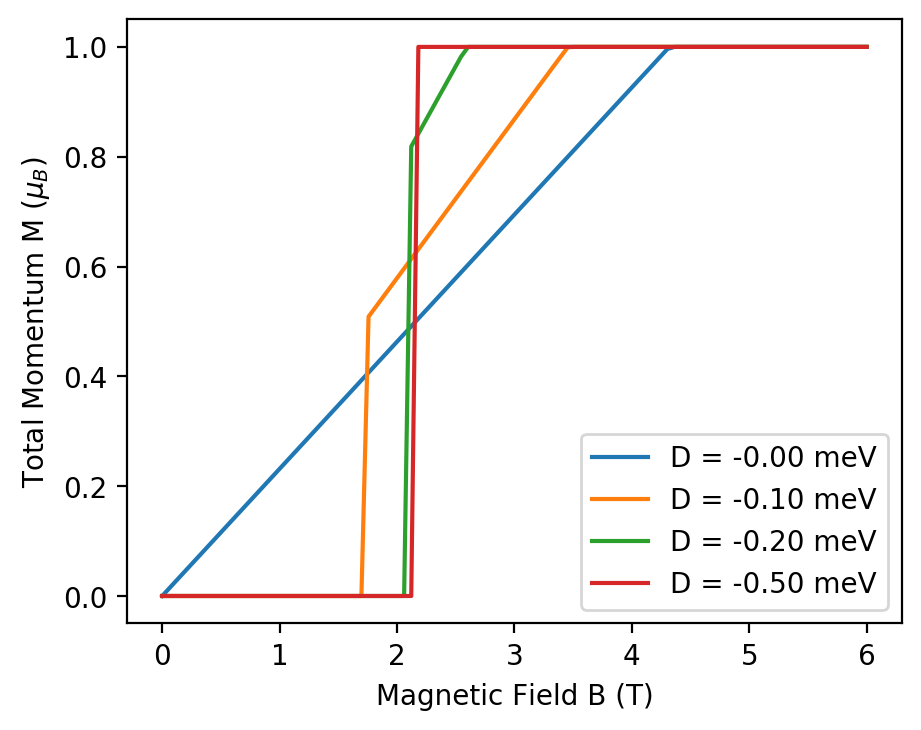

In [654]:
M_BD = []
for a, b in zip(alpha_BD, beta_BD):
    M_BD.append(M_theta((a, b), S, mu_B))
    
plt.figure(figsize=(5,4), dpi = 200)
for M in M_BD:
    plt.plot(Bs, M[0])
plt.xlabel("Magnetic Field B (T)")
plt.ylabel("Total Momentum M ($\mu_B$)")
plt.legend([f"D = {D:.2f} meV" for D in Ds], loc='lower right')
plt.show()

## Perpendicular

In [662]:
S = 1/2
mu_B = 5.7884e-2 # meV / T
J = 0.5 # meV
Ds = -np.array([0.0, 0.1, 0.2])
# Ds = -np.array([0.2])
Bs = np.linspace(0, 7, 100)
theta = np.pi/2
E_BD = []
alpha_BD = []
beta_BD = []

bounds = [[0, np.pi/2], [0, 2*np.pi]]
x0 = [0, 0]

for D in Ds:
    E_B = []
    alpha_B = []
    beta_B = []
    for B in Bs:
        args = (theta, S, mu_B, J, D, B)
        result = optimize.dual_annealing(E_theta, bounds=bounds, x0=x0, args=args)
        alpha, beta = result.x
        E_B.append(result.fun)
        alpha_B.append(alpha)
        beta_B.append(beta)
    E_BD.append(E_B)
    alpha_BD.append(alpha_B)
    beta_BD.append(beta_B)
E_BD = np.array(E_BD)
alpha_BD = np.array(alpha_BD)
beta_BD = np.array(beta_BD)

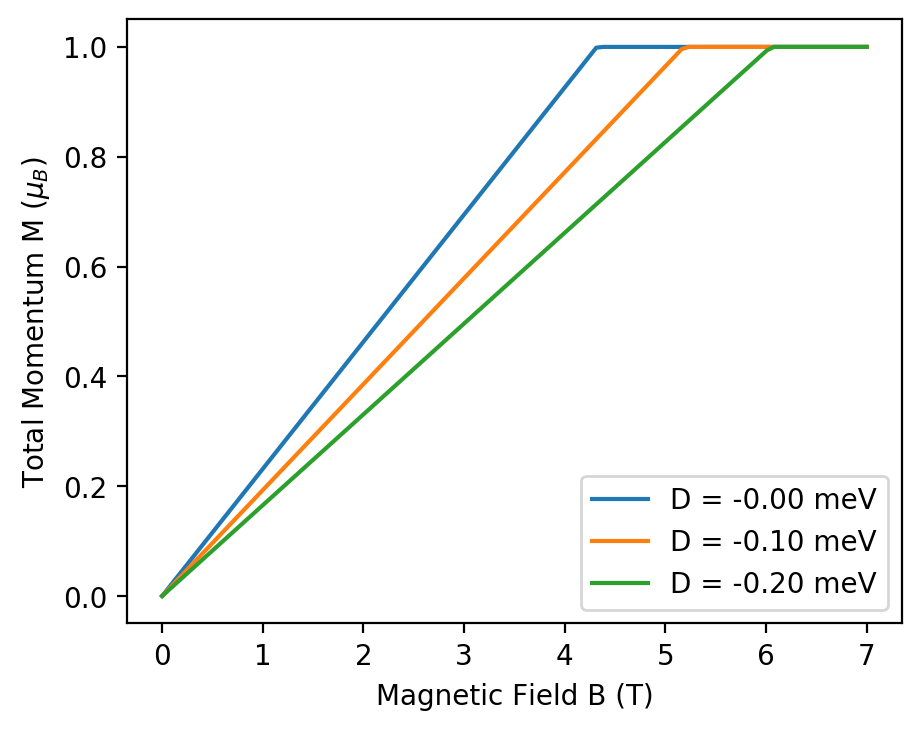

In [663]:
M_BD = []
for a, b in zip(alpha_BD, beta_BD):
    M_BD.append(M_theta((a, b), S, mu_B))
    
plt.figure(figsize=(5,4), dpi = 200)
for M in M_BD:
    plt.plot(Bs, M[1])
plt.xlabel("Magnetic Field B (T)")
plt.ylabel("Total Momentum M ($\mu_B$)")
plt.legend([f"D = {D:.2f} meV" for D in Ds], loc='lower right')
plt.show()

## 30 degrees

In [697]:
S = 1/2
mu_B = 5.7884e-2 # meV / T
J = 0.5 # meV
# Ds = -np.array([0.0, 0.1, 0.2])
Ds = -np.array([0.2])
Bs = np.linspace(0, 7, 100)
theta = np.pi/6
E_BD = []
alpha_BD = []
beta_BD = []

bounds = [[-np.pi/2, np.pi/2], [0, 2*np.pi]]
x0 = [0, 0]

for D in Ds:
    E_B = []
    alpha_B = []
    beta_B = []
    for B in Bs:
        args = (theta, S, mu_B, J, D, B)
        result = optimize.dual_annealing(E_theta, bounds=bounds, x0=x0, args=args)
        alpha, beta = result.x
        E_B.append(result.fun)
        alpha_B.append(alpha)
        beta_B.append(beta)
    E_BD.append(E_B)
    alpha_BD.append(alpha_B)
    beta_BD.append(beta_B)
E_BD = np.array(E_BD)
alpha_BD = np.array(alpha_BD)
beta_BD = np.array(beta_BD)

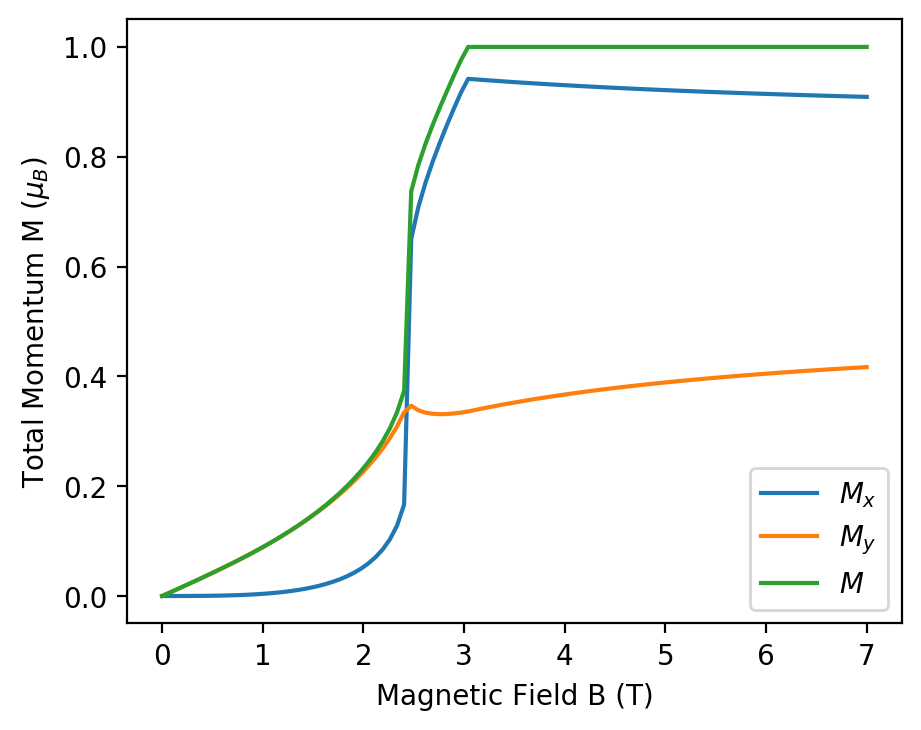

In [702]:
M_BD = []
for a, b in zip(alpha_BD, beta_BD):
    M_BD.append(M_theta((a, b), S, mu_B))
    
plt.figure(figsize=(5,4), dpi = 200)
for M in M_BD:
    plt.plot(Bs, M[0], label = "$M_x$")
    plt.plot(Bs, M[1], label = "$M_y$")
    plt.plot(Bs, np.sqrt(M[0]**2+M[1]**2), label = "$M$")
plt.xlabel("Magnetic Field B (T)")
plt.ylabel("Total Momentum M ($\mu_B$)")
# plt.legend([f"D = {D:.2f} meV" for D in Ds], loc='lower right')
plt.legend(loc='lower right')
plt.show()

/Users/jackblack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


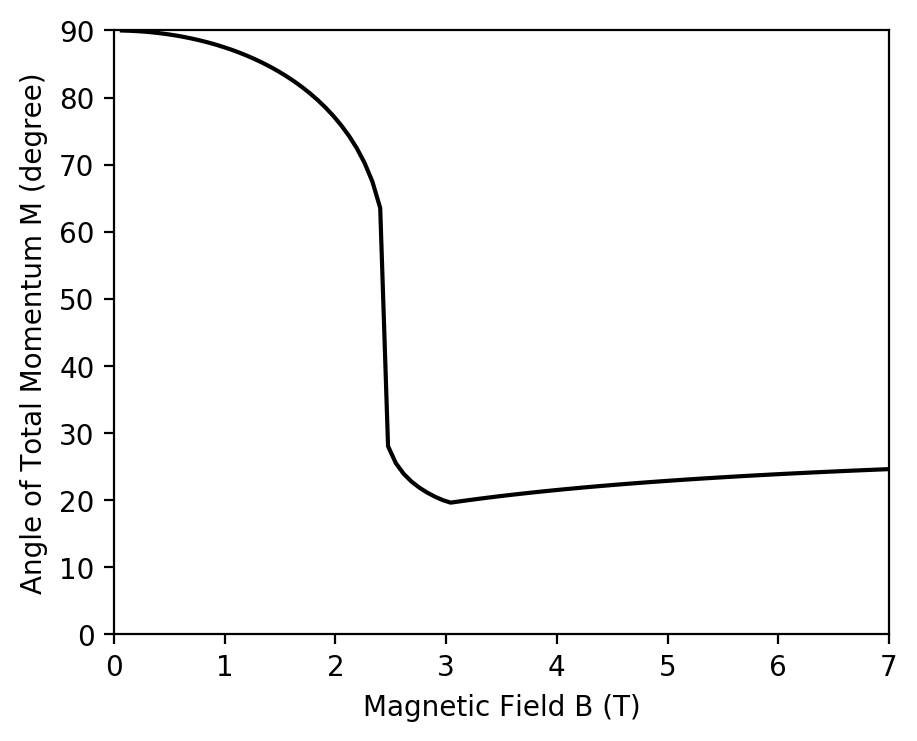

In [712]:
plt.figure(figsize=(5,4), dpi = 200)
plt.plot(Bs, np.arctan(M[1]/M[0])/np.pi * 180, c='k')
plt.xlabel("Magnetic Field B (T)")
plt.ylabel("Angle of Total Momentum M (degree)")
plt.xlim(0,7)
plt.ylim(0,90)
plt.show()

In [1074]:
S = 1/2
mu_B = 5.7884e-2 # meV / T
J = 0.5 # meV
Ds = -np.array([0.0, 0.1, 0.2])
# Ds = -np.array([0.2])
Bs = np.linspace(0, 7, 100)
theta = np.pi/6
E_BD = []
alpha_BD = []
beta_BD = []

bounds = [[-np.pi/2, np.pi/2], [0, 2*np.pi]]
x0 = [0, 0]

for D in Ds:
    E_B = []
    alpha_B = []
    beta_B = []
    for B in Bs:
        args = (theta, S, mu_B, J, D, B)
        result = optimize.dual_annealing(E_theta, bounds=bounds, x0=x0, args=args)
        alpha, beta = result.x
        E_B.append(result.fun)
        alpha_B.append(alpha)
        beta_B.append(beta)
    E_BD.append(E_B)
    alpha_BD.append(alpha_B)
    beta_BD.append(beta_B)
E_BD = np.array(E_BD)
alpha_BD = np.array(alpha_BD)
beta_BD = np.array(beta_BD)

In [1078]:
M_BD.shape

(3, 2, 100)

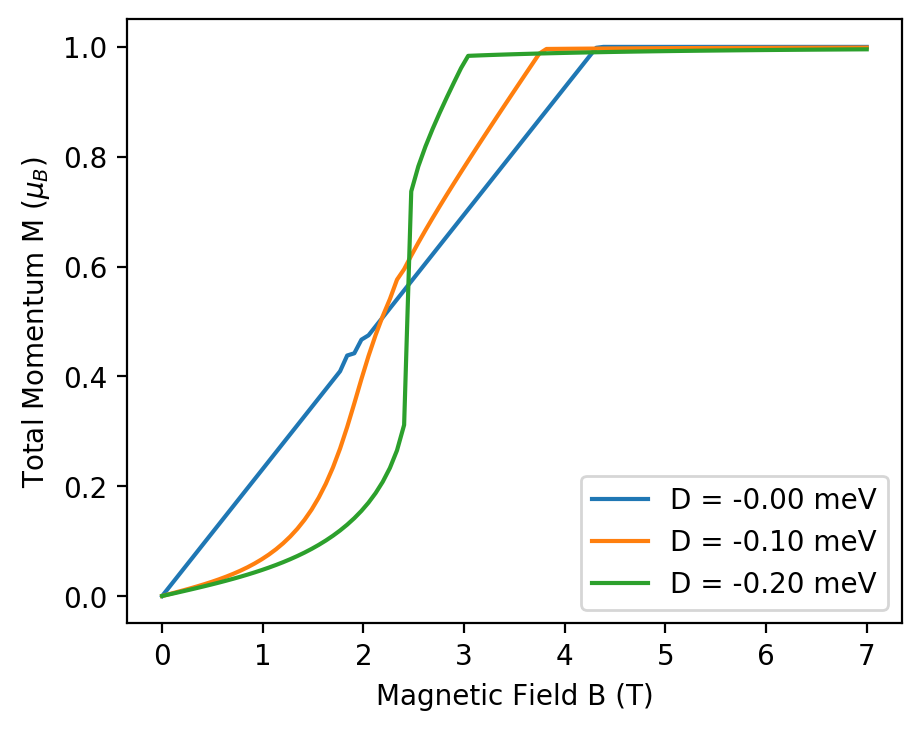

In [1080]:
M_BD = []
for a, b in zip(alpha_BD, beta_BD):
    M_BD.append(M_theta((a, b), S, mu_B))
M_BD = np.array(M_BD)
    
M1 = M_BD[:,0,:] * np.cos(theta)
M2 = M_BD[:,1,:] * np.sin(theta)
Ms_BT_para = M1 + M2
    
plt.figure(figsize=(5,4), dpi = 200)
for M in Ms_BT_para:
#     plt.plot(Bs, M[0], label = "$M_x$")
#     plt.plot(Bs, M[1], label = "$M_y$")
    plt.plot(Bs, M)#, label = "$M$")
plt.xlabel("Magnetic Field B (T)")
plt.ylabel("Total Momentum M ($\mu_B$)")
plt.legend([f"D = {D:.2f} meV" for D in Ds], loc='lower right')
# plt.legend(loc='lower right')
plt.show()

# 10 degrees

In [1085]:
S = 1/2
mu_B = 5.7884e-2 # meV / T
J = 0.5 # meV
Ds = -np.array([0.0, 0.1, 0.2, 0.5])
# Ds = -np.array([0.2])
Bs = np.linspace(0, 7, 100)
theta = np.pi/18
E_BD = []
alpha_BD = []
beta_BD = []

bounds = [[-np.pi/2, np.pi/2], [0, 2*np.pi]]
x0 = [0, 0]

for D in Ds:
    E_B = []
    alpha_B = []
    beta_B = []
    for B in Bs:
        args = (theta, S, mu_B, J, D, B)
        result = optimize.dual_annealing(E_theta, bounds=bounds, x0=x0, args=args)
        alpha, beta = result.x
        E_B.append(result.fun)
        alpha_B.append(alpha)
        beta_B.append(beta)
    E_BD.append(E_B)
    alpha_BD.append(alpha_B)
    beta_BD.append(beta_B)
E_BD = np.array(E_BD)
alpha_BD = np.array(alpha_BD)
beta_BD = np.array(beta_BD)

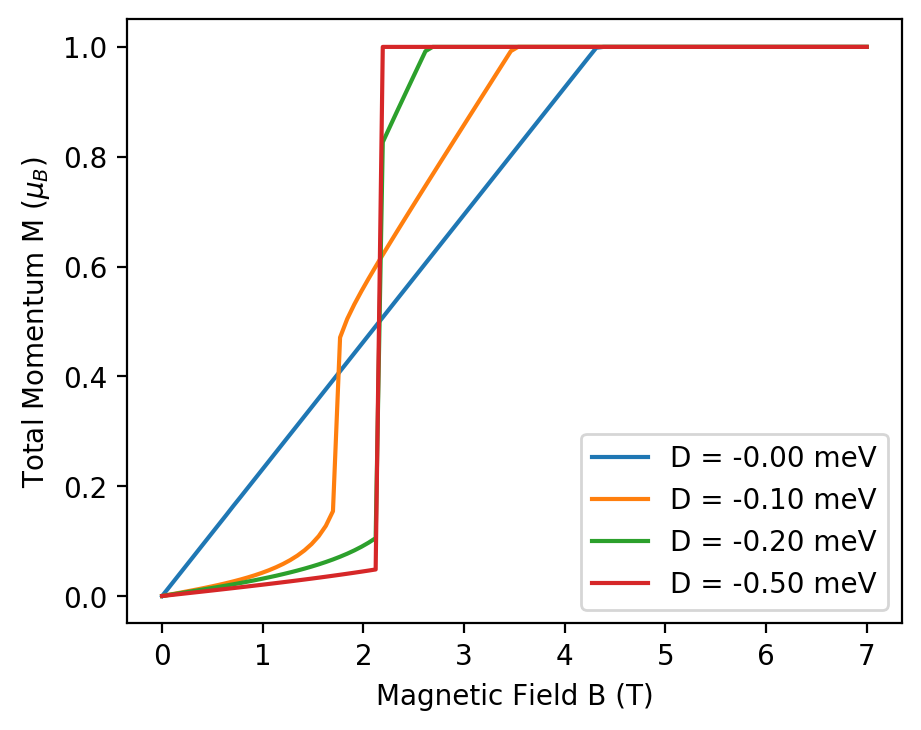

In [1088]:
M_BD = []
for a, b in zip(alpha_BD, beta_BD):
    M_BD.append(M_theta((a, b), S, mu_B))
    
plt.figure(figsize=(5,4), dpi = 200)
for M in M_BD:
#     plt.plot(Bs, M[0], label = "$M_x$")
#     plt.plot(Bs, M[1], label = "$M_y$")
    plt.plot(Bs, np.sqrt(M[0]**2+M[1]**2))#, label = "$M$")
plt.xlabel("Magnetic Field B (T)")
plt.ylabel("Total Momentum M ($\mu_B$)")
plt.legend([f"D = {D:.2f} meV" for D in Ds], loc='lower right')
# plt.legend(loc='lower right')
plt.show()

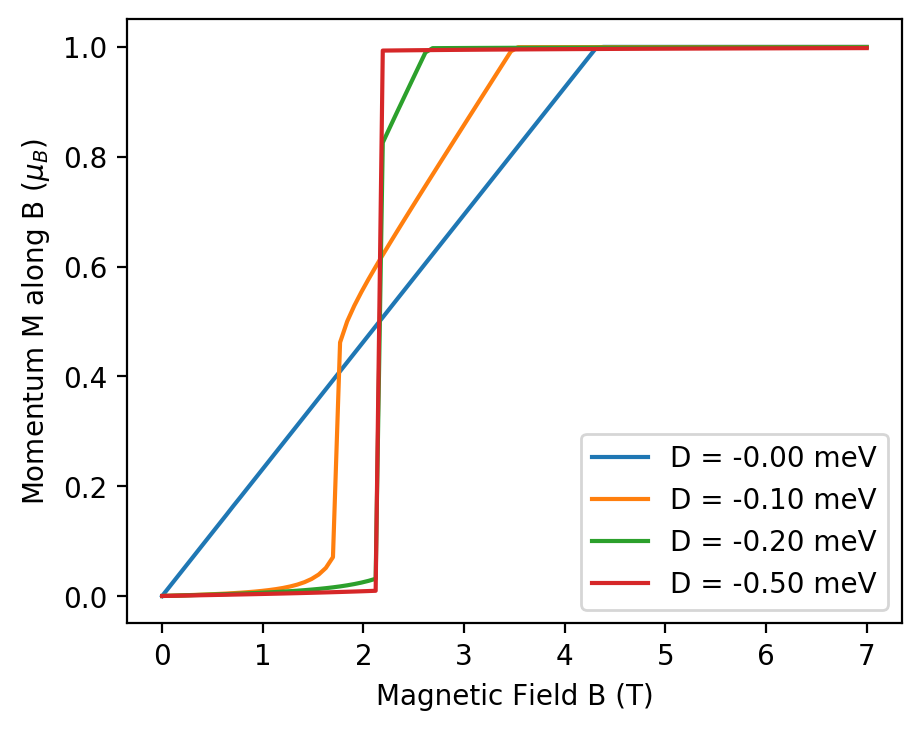

In [1089]:
M_BD = []
for a, b in zip(alpha_BD, beta_BD):
    M_BD.append(M_theta((a, b), S, mu_B))
M_BD = np.array(M_BD)
    
M1 = M_BD[:,0,:] * np.cos(theta)
M2 = M_BD[:,1,:] * np.sin(theta)
Ms_BT_para = M1 + M2
    
plt.figure(figsize=(5,4), dpi = 200)
for M in Ms_BT_para:
    plt.plot(Bs, M)#, label = "$M$")
plt.xlabel("Magnetic Field B (T)")
plt.ylabel("Momentum M along B ($\mu_B$)")
plt.legend([f"D = {D:.2f} meV" for D in Ds], loc='lower right')
# plt.legend(loc='lower right')
plt.show()

# 5 degrees

In [1081]:
S = 1/2
mu_B = 5.7884e-2 # meV / T
J = 0.5 # meV
Ds = -np.array([0.0, 0.1, 0.2, 0.5])
# Ds = -np.array([0.2])
Bs = np.linspace(0, 7, 100)
theta = np.pi/36
E_BD = []
alpha_BD = []
beta_BD = []

bounds = [[-np.pi/2, np.pi/2], [0, 2*np.pi]]
x0 = [0, 0]

for D in Ds:
    E_B = []
    alpha_B = []
    beta_B = []
    for B in Bs:
        args = (theta, S, mu_B, J, D, B)
        result = optimize.dual_annealing(E_theta, bounds=bounds, x0=x0, args=args)
        alpha, beta = result.x
        E_B.append(result.fun)
        alpha_B.append(alpha)
        beta_B.append(beta)
    E_BD.append(E_B)
    alpha_BD.append(alpha_B)
    beta_BD.append(beta_B)
E_BD = np.array(E_BD)
alpha_BD = np.array(alpha_BD)
beta_BD = np.array(beta_BD)

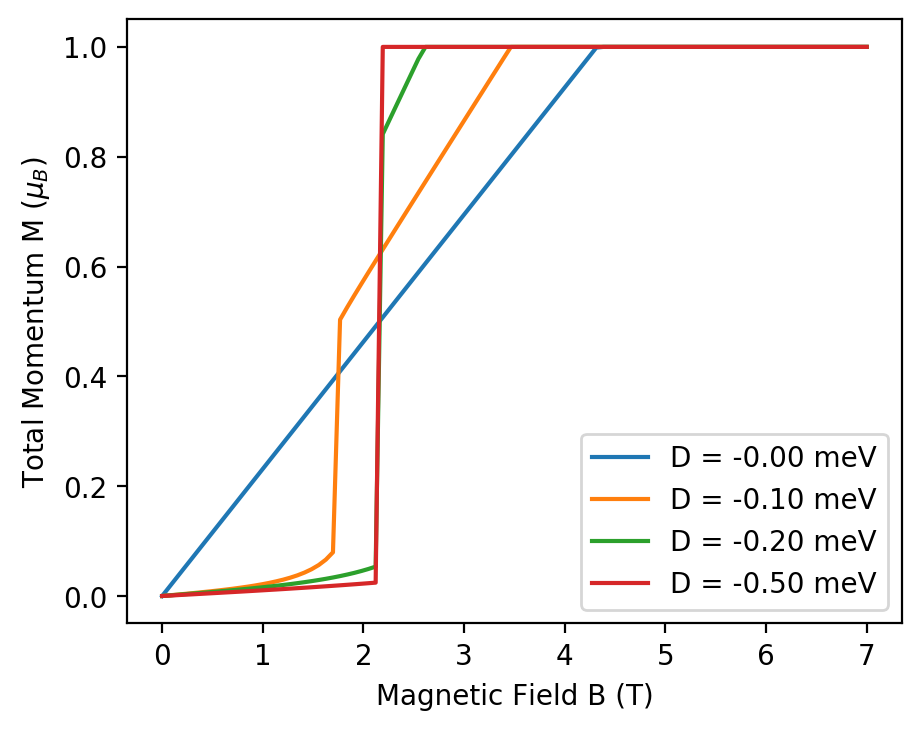

In [732]:
M_BD = []
for a, b in zip(alpha_BD, beta_BD):
    M_BD.append(M_theta((a, b), S, mu_B))
    
plt.figure(figsize=(5,4), dpi = 200)
for M in M_BD:
#     plt.plot(Bs, M[0], label = "$M_x$")
#     plt.plot(Bs, M[1], label = "$M_y$")
    plt.plot(Bs, np.sqrt(M[0]**2+M[1]**2))#, label = "$M$")
plt.xlabel("Magnetic Field B (T)")
plt.ylabel("Total Momentum M ($\mu_B$)")
plt.legend([f"D = {D:.2f} meV" for D in Ds], loc='lower right')
# plt.legend(loc='lower right')
plt.show()

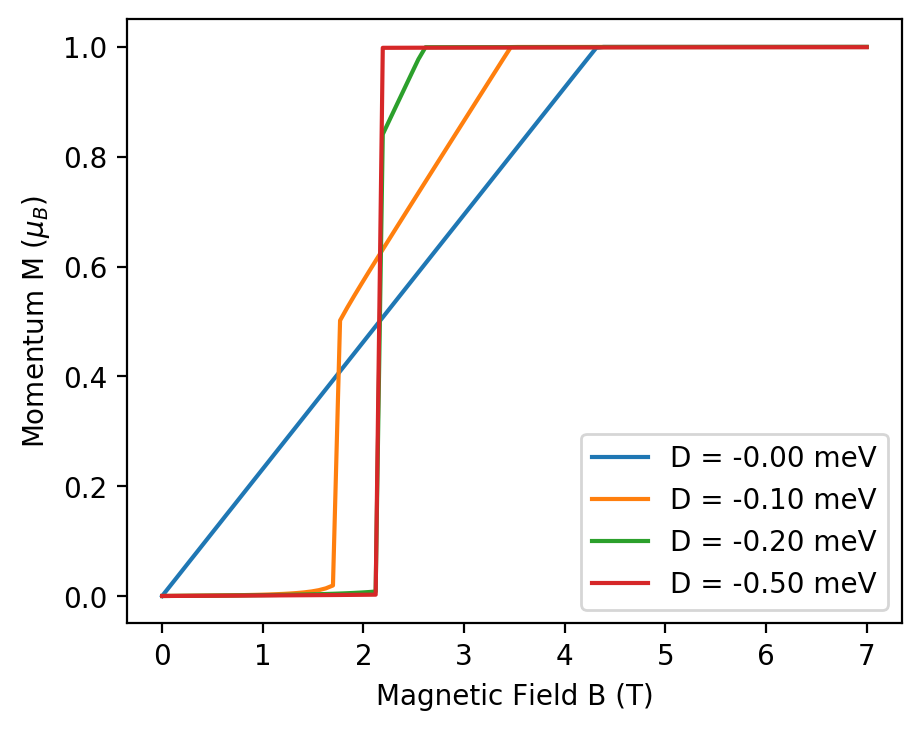

In [1084]:
M_BD = []
for a, b in zip(alpha_BD, beta_BD):
    M_BD.append(M_theta((a, b), S, mu_B))
M_BD = np.array(M_BD)
    
M1 = M_BD[:,0,:] * np.cos(theta)
M2 = M_BD[:,1,:] * np.sin(theta)
Ms_BT_para = M1 + M2
    
plt.figure(figsize=(5,4), dpi = 200)
for M in Ms_BT_para:
    plt.plot(Bs, M)#, label = "$M$")
plt.xlabel("Magnetic Field B (T)")
plt.ylabel("Momentum M ($\mu_B$)")
plt.legend([f"D = {D:.2f} meV" for D in Ds], loc='lower right')
# plt.legend(loc='lower right')
plt.show()

## Heatmap (M vs theta & field)

In [851]:
# constants
S = 1/2
mu_B = 5.7884e-2 # meV / T
J = 0.5 # meV
D = -0.2 # meV

# mesh
NT, NB = 100, 200
thetas = np.linspace(0, np.pi/2, NT)
B0s = np.linspace(0, 7, NB)

# travel through mesh
start_time = time.time()
Ms_BT = []
i = 1
progress_counter = 0
for theta in thetas:
    Ms_B = []
    for B0 in B0s:
        bounds = [[-np.pi/2, theta], [0, 2*np.pi]]
        x0 = [0, 0]
        args = (theta, S, mu_B, J, D, B0)
        result = optimize.dual_annealing(E_theta, bounds=bounds, x0=x0, args=args)
        alpha, beta = result.x
        Ms_B.append(M_theta((alpha, beta), S, mu_B))
        elapsed_time = time.time() - start_time
        # print progress
        flag = i / (NT*NB) * 100
        if flag // 1 > progress_counter:
            progress_counter += 1
            print(f"Progress: {flag:5.1f}% | Time consuming: {elapsed_time:8.3f}s | Estimated Time Remain: {elapsed_time / i * (NT*NB-i):8.3f}s")
        i = i + 1
    Ms_BT.append(Ms_B)
Ms_BT = np.array(Ms_BT)

Progress:   1.0% | Time consuming:   43.530s | Estimated Time Remain: 4309.500s
Progress:   2.0% | Time consuming:   84.454s | Estimated Time Remain: 4138.239s
Progress:   3.0% | Time consuming:  125.645s | Estimated Time Remain: 4062.520s
Progress:   4.0% | Time consuming:  166.430s | Estimated Time Remain: 3994.309s
Progress:   5.0% | Time consuming:  207.156s | Estimated Time Remain: 3935.969s
Progress:   6.0% | Time consuming:  247.945s | Estimated Time Remain: 3884.475s
Progress:   7.0% | Time consuming:  288.605s | Estimated Time Remain: 3834.320s
Progress:   8.0% | Time consuming:  329.961s | Estimated Time Remain: 3794.551s
Progress:   9.0% | Time consuming:  371.118s | Estimated Time Remain: 3752.416s
Progress:  10.0% | Time consuming:  411.948s | Estimated Time Remain: 3707.534s
Progress:  11.0% | Time consuming:  453.641s | Estimated Time Remain: 3670.370s
Progress:  12.0% | Time consuming:  494.206s | Estimated Time Remain: 3624.178s
Progress:  13.0% | Time consuming:  534.

In [849]:
np.save("./Ms_BT_100x100.npy", Ms_BT)

In [859]:
np.save("./Ms_BT_200x100.npy", Ms_BT)

In [852]:
Ms_BT_tot = np.sqrt(np.sum(Ms_BT**2, axis = 2))

In [894]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

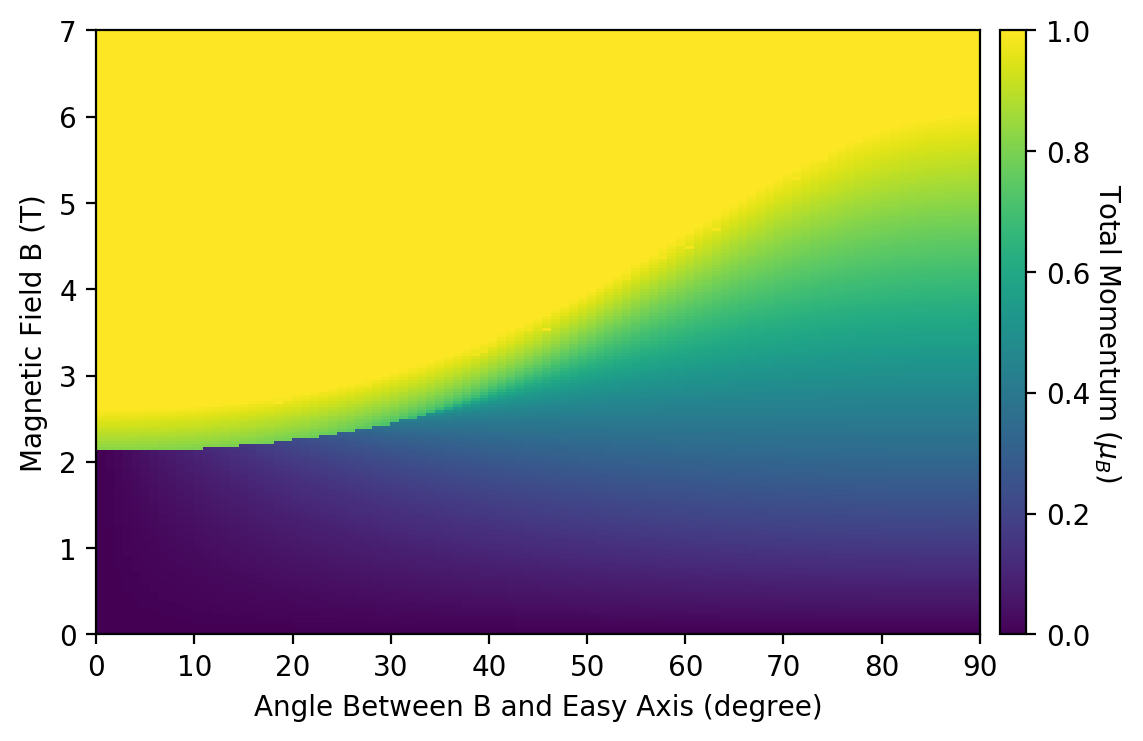

In [901]:
tt, bb = np.meshgrid(thetas, B0s)
plt.figure(dpi=200)
img = plt.pcolormesh(tt/np.pi*180, bb, Ms_BT_tot.T, cmap = 'viridis')
plt.xlabel("Angle Between B and Easy Axis (degree)")
plt.ylabel("Magnetic Field B (T)")

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="3%", pad=0.1)
clb = plt.colorbar(img, cax)
clb.ax.get_yaxis().labelpad = 12
clb.set_label("Total Momentum ($\mu_B$)", rotation = -90)

plt.show()

In [1091]:
Ms_BT = np.load("./Ms_BT_200x100.npy")

In [1092]:
M1 = Ms_BT[:,:,0] * np.expand_dims(np.cos(thetas), axis=1)
M2 = Ms_BT[:,:,1] * np.expand_dims(np.sin(thetas), axis=1)
Ms_BT_para = M1 + M2

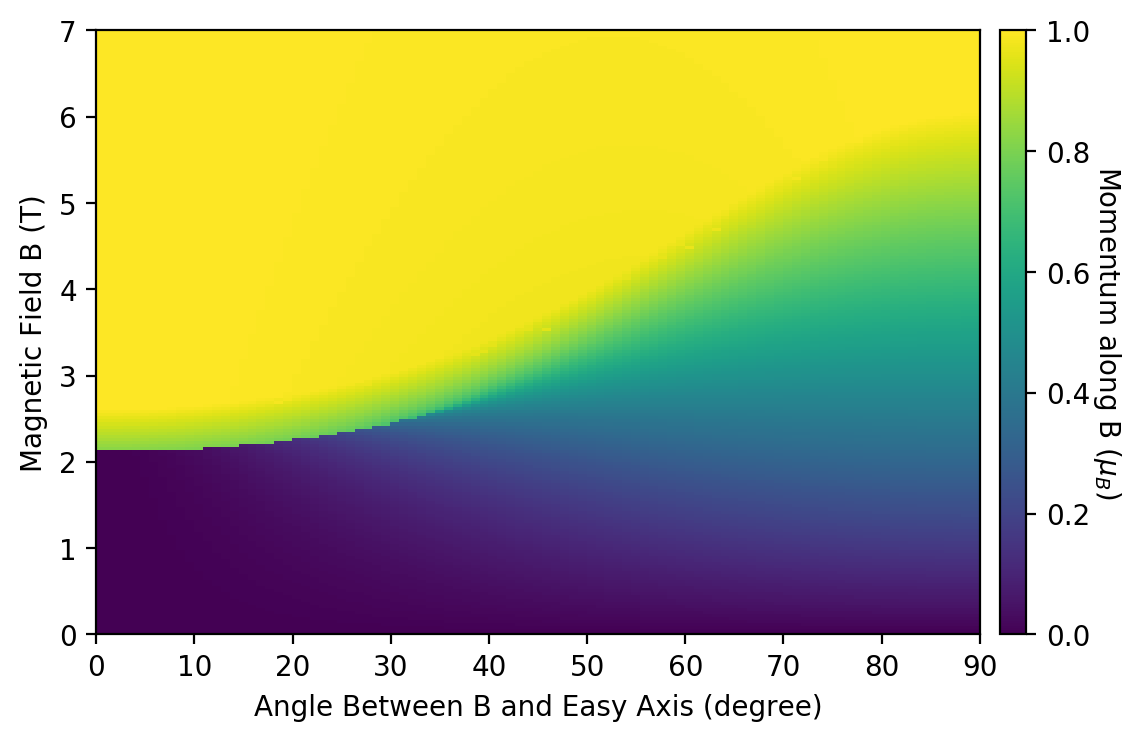

In [1094]:
NT, NB = 100, 200
thetas = np.linspace(0, np.pi/2, NT)
B0s = np.linspace(0, 7, NB)
tt, bb = np.meshgrid(thetas, B0s)
plt.figure(dpi=200)
img = plt.pcolormesh(tt/np.pi*180, bb, Ms_BT_para.T, cmap = 'viridis')
plt.xlabel("Angle Between B and Easy Axis (degree)")
plt.ylabel("Magnetic Field B (T)")

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="3%", pad=0.1)
clb = plt.colorbar(img, cax)
clb.ax.get_yaxis().labelpad = 12
clb.set_label("Momentum along B ($\mu_B$)", rotation = -90)

plt.show()

In [836]:
from mpl_toolkits import mplot3d

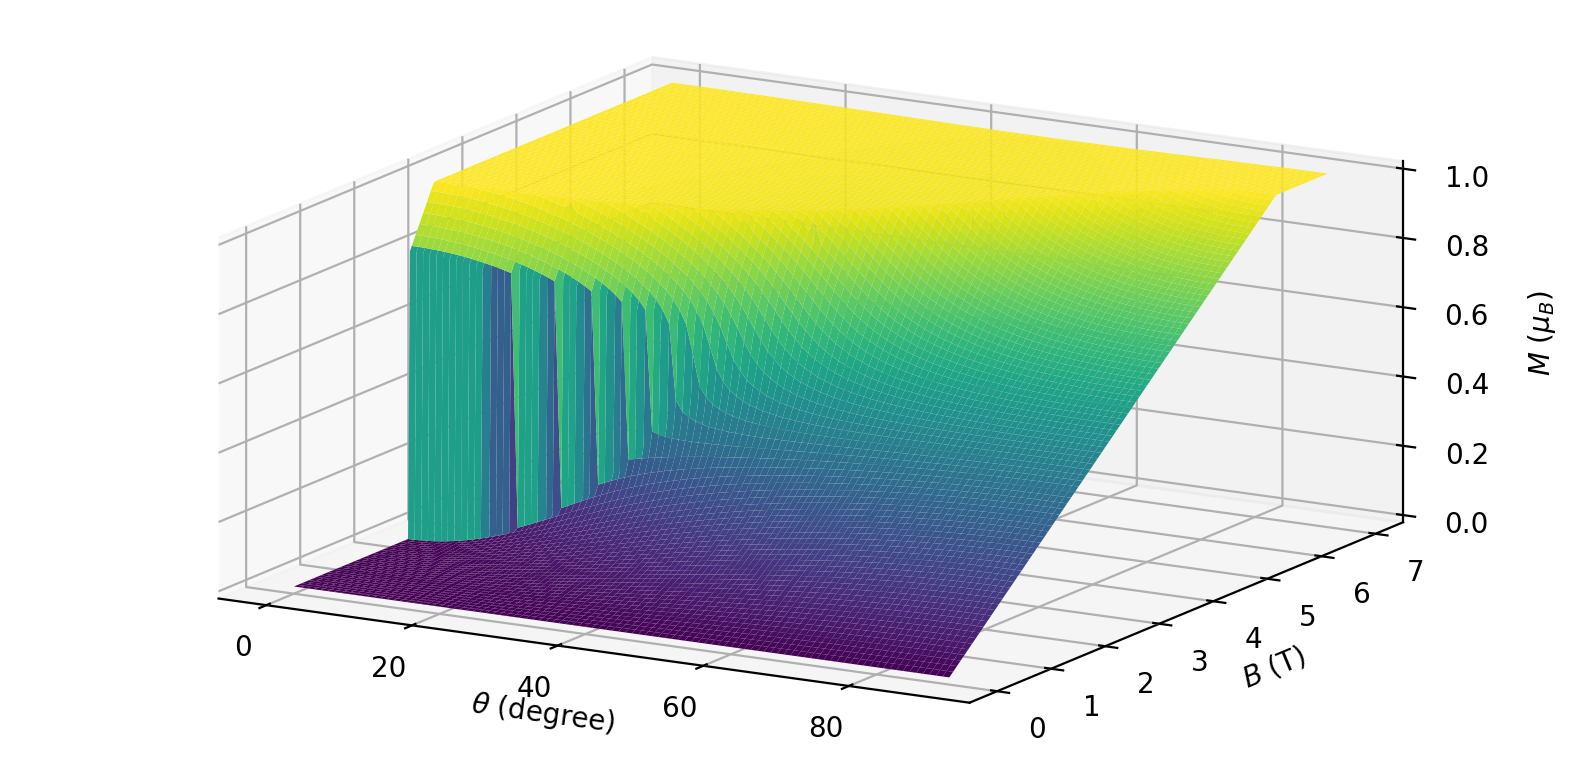

In [1108]:
fig = plt.figure(figsize = (8, 4), dpi = 200)
ax = plt.axes(projection='3d', proj_type = 'ortho')
ax.plot_surface(tt/np.pi*180, bb, Ms_BT_para.T,
                rstride=2, cstride=1, 
                cmap='viridis', edgecolor='none', linewidth=0)
ax.set_xlabel("$\\theta$ (degree)")
ax.set_ylabel("$B$ (T)")
ax.set_zlabel("$M$ ($\mu_B$)")
plt.tight_layout()
plt.show()

In [840]:
import plotly.graph_objects as go

In [841]:
fig = go.Figure(data=[go.Surface(x = thetas, y = B0s, z=Ms_BT_tot.T)])

fig.update_layout(title='Scan #39 XAS (SDD out of plane)',
                  
                  margin=dict(l=60, r=60, b=65, t=90))

fig.update_layout(scene_aspectmode='manual', scene_aspectratio=dict(x=2, y=1, z=1))

fig.update_layout(scene = dict(
                    xaxis_title='incident photon energy (eV)',
                    yaxis_title='SDD photon energy (eV)',
                    zaxis_title='intensity (arb. unit)'),
                    autosize=False, width=900, height=600,
                    margin=dict(l=50, r=50, b=20, t=50))

camera = dict(
    eye=dict(x=1.0, y=-2.0, z=0.9),
    center=dict(x=0, y=-0.1, z=-0.2)
)

fig.update_layout(scene_camera=camera)

fig.show()

In [903]:
Ms_BT_tot.shape

(100, 200)

In [926]:
chi = np.gradient(Ms_BT_tot, B0s, axis=1)

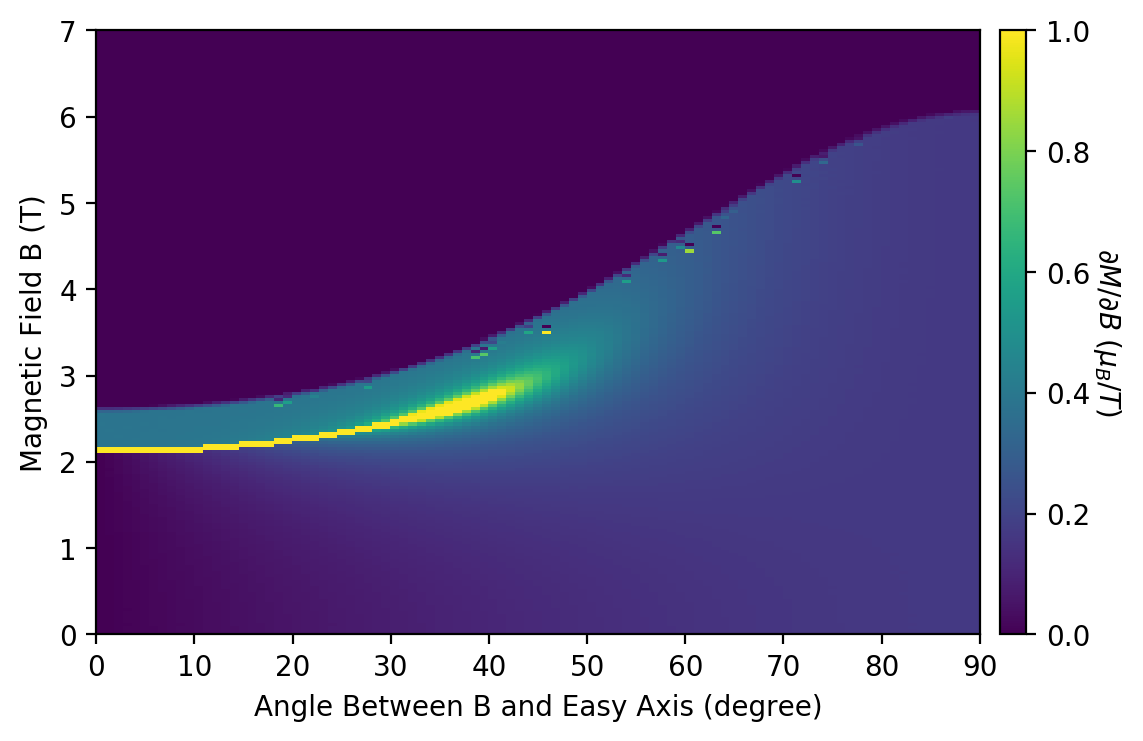

In [934]:
tt, bb = np.meshgrid(thetas, B0s)
plt.figure(dpi=200)
img = plt.pcolormesh(tt/np.pi*180, bb, chi.T, cmap = 'viridis', vmax = 1, vmin = 0)
plt.xlabel("Angle Between B and Easy Axis (degree)")
plt.ylabel("Magnetic Field B (T)")

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="3%", pad=0.1)
clb = plt.colorbar(img, cax)
clb.ax.get_yaxis().labelpad = 12
clb.set_label("$\partial M / \partial B$ ($\mu_B/T$)", rotation = -90)

plt.show()

In [949]:
B0s[20]

0.7035175879396984

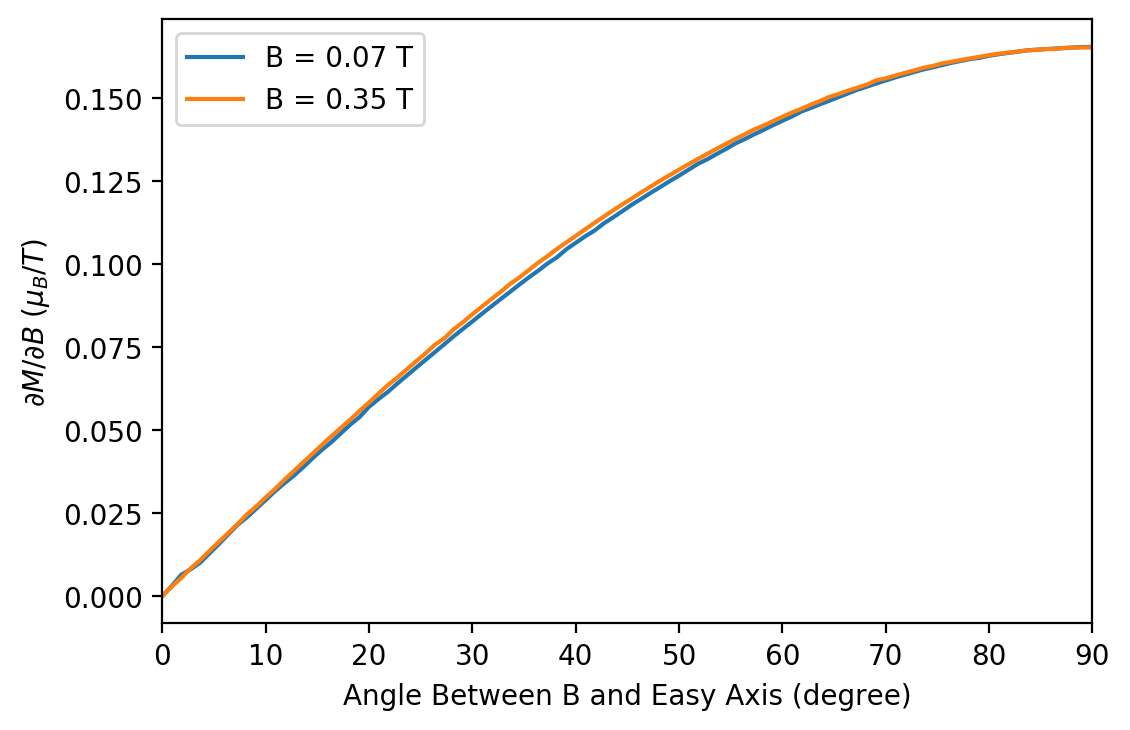

In [1023]:
plt.figure(dpi=200)
plt.plot(thetas/np.pi*180, chi[:,2], label = f"B = {B0s[2]:.2f} T")
plt.plot(thetas/np.pi*180, chi[:,10], label = f"B = {B0s[10]:.2f} T")
plt.xlim(0, 90)
plt.xlabel("Angle Between B and Easy Axis (degree)")
plt.ylabel("$\partial M / \partial B$ ($\mu_B/T$)")
plt.legend()
plt.show()

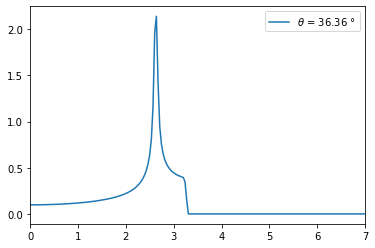

In [966]:
plt.figure()
# plt.plot(B0s, chi[0], label = f"$\\theta$ = {thetas[0]/np.pi*180:.2f} °")
plt.plot(B0s, chi[40], label = f"$\\theta$ = {thetas[40]/np.pi*180:.2f} °")
plt.xlim(0, 7)
plt.legend()
plt.show()

In [967]:
mu_0 = 4e-7*np.pi # H/m

In [968]:
mu_B_SI = 9.274e-24 # J/T

In [989]:
M_s = mu_B_SI / 1e-27# A/m

In [982]:
0.1/mu_0 - M_s

-9194422.528454052

In [1015]:
test = chi * mu_0 / (1 - chi * mu_0)

In [1016]:
test.shape

(100, 200)

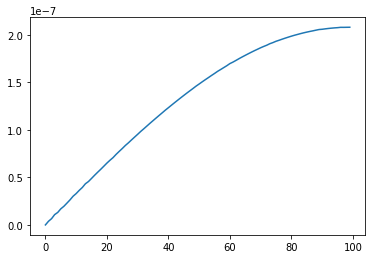

In [1019]:
plt.plot(test[:,1])

In [1045]:
chi = np.gradient(Ms_BT_para, B0s, axis=1)

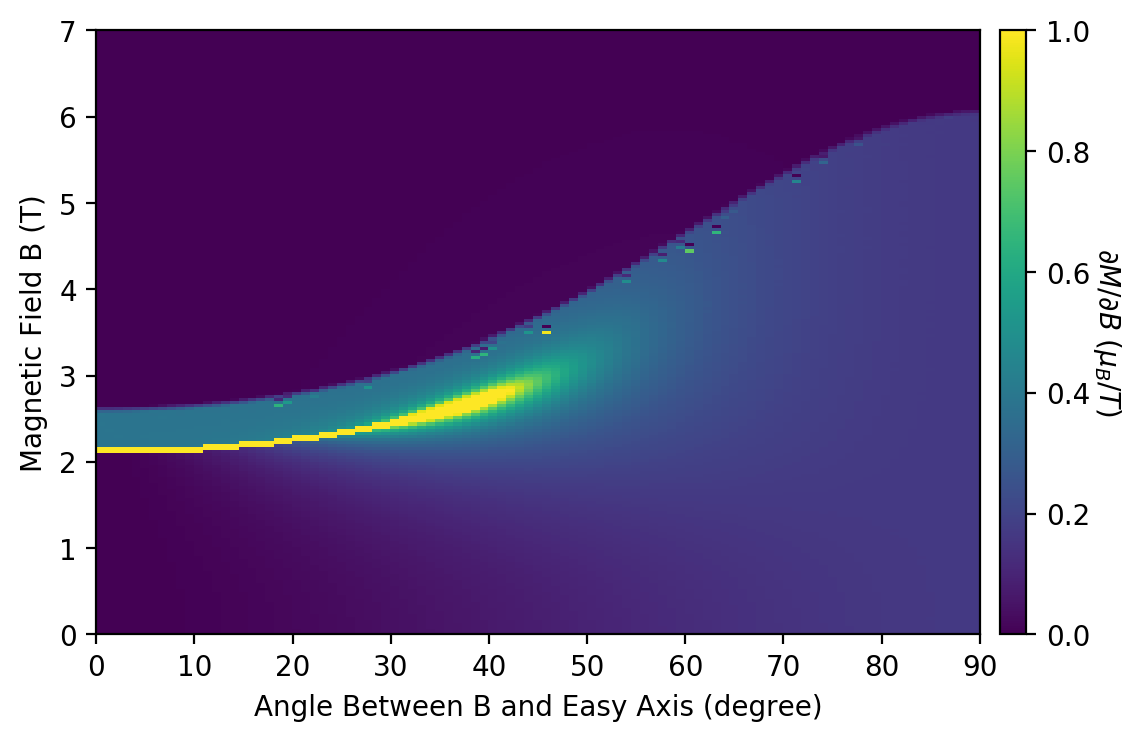

In [1050]:
tt, bb = np.meshgrid(thetas, B0s)
plt.figure(dpi=200)
img = plt.pcolormesh(tt/np.pi*180, bb, chi.T, cmap = 'viridis', vmax = 1, vmin = 0)
plt.xlabel("Angle Between B and Easy Axis (degree)")
plt.ylabel("Magnetic Field B (T)")

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="3%", pad=0.1)
clb = plt.colorbar(img, cax)
clb.ax.get_yaxis().labelpad = 12
clb.set_label("$\partial M / \partial B$ ($\mu_B/T$)", rotation = -90)

plt.show()

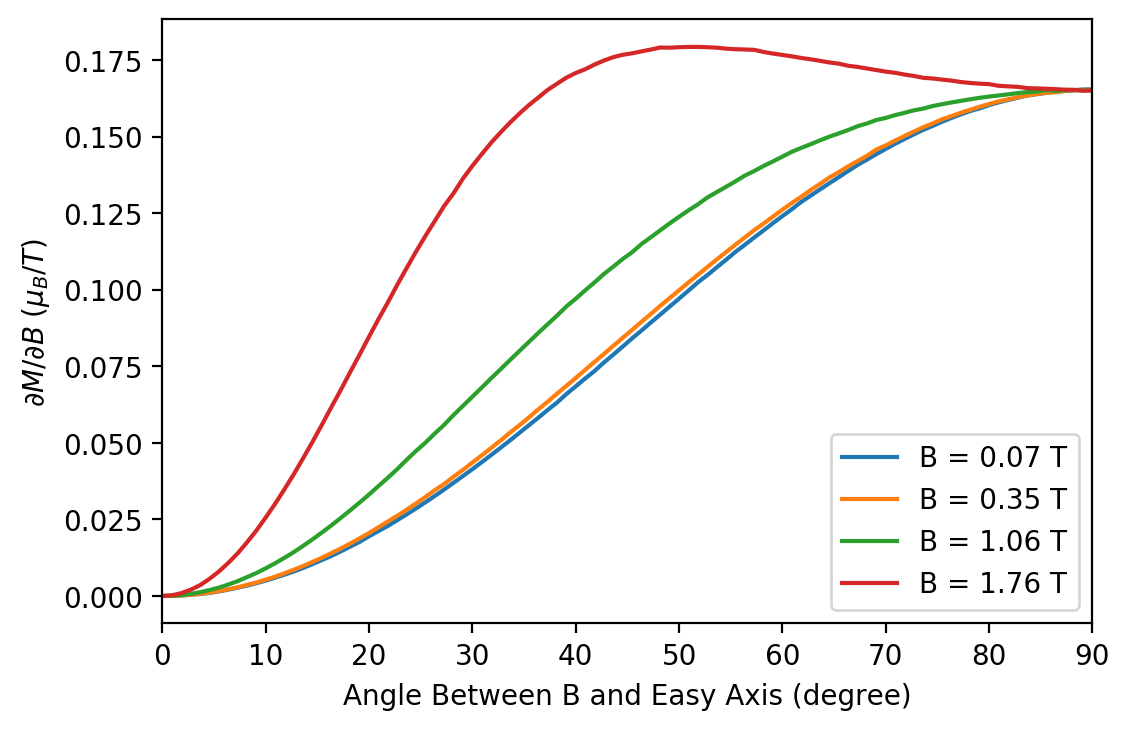

In [1109]:
plt.figure(dpi=200)
plt.plot(thetas/np.pi*180, chi[:,2], label = f"B = {B0s[2]:.2f} T")
plt.plot(thetas/np.pi*180, chi[:,10], label = f"B = {B0s[10]:.2f} T")
plt.plot(thetas/np.pi*180, chi[:,30], label = f"B = {B0s[30]:.2f} T")
plt.plot(thetas/np.pi*180, chi[:,50], label = f"B = {B0s[50]:.2f} T")
plt.xlim(0, 90)
plt.xlabel("Angle Between B and Easy Axis (degree)")
plt.ylabel("$\partial M / \partial B$ ($\mu_B/T$)")
plt.legend(loc = 'lower right')
plt.show()

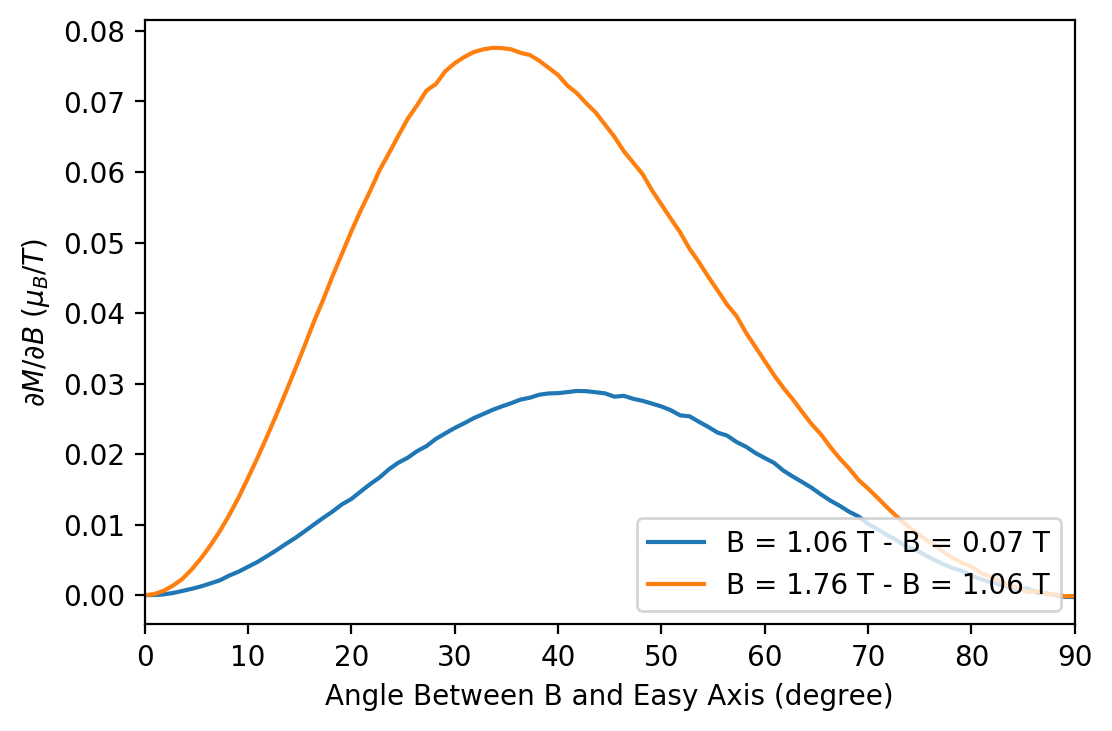

In [1117]:
plt.figure(dpi=200)
# plt.plot(thetas/np.pi*180, chi[:,2], label = f"B = {B0s[2]:.2f} T")
plt.plot(thetas/np.pi*180, chi[:,30] - chi[:,2], label = f"B = {B0s[30]:.2f} T - B = {B0s[2]:.2f} T")
plt.plot(thetas/np.pi*180, chi[:,50] - chi[:,30], label = f"B = {B0s[50]:.2f} T - B = {B0s[30]:.2f} T")
plt.xlim(0, 90)
plt.xlabel("Angle Between B and Easy Axis (degree)")
plt.ylabel("$\partial M / \partial B$ ($\mu_B/T$)")
plt.legend(loc = 'lower right')
plt.show()

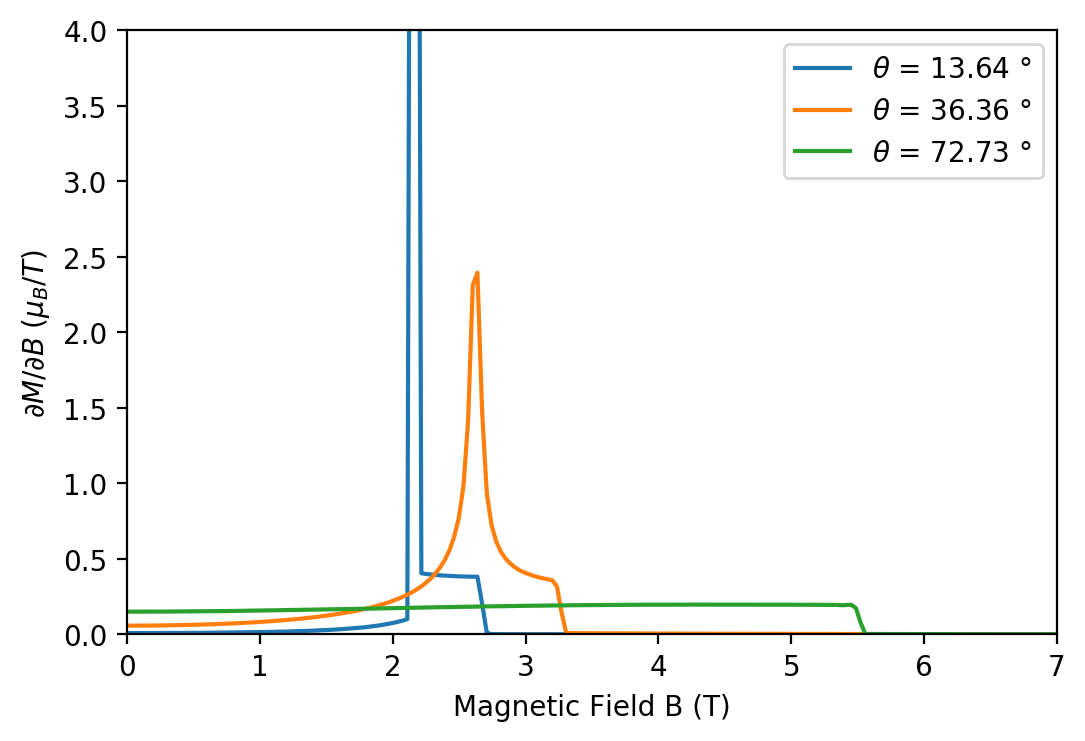

In [1119]:
plt.figure(dpi=200)
# plt.plot(B0s, chi[3,:], label = f"$\\theta$ = {thetas[3]/np.pi*180:.2f} °")
plt.plot(B0s, chi[15,:], label = f"$\\theta$ = {thetas[15]/np.pi*180:.2f} °")
plt.plot(B0s, chi[40,:], label = f"$\\theta$ = {thetas[40]/np.pi*180:.2f} °")
plt.plot(B0s, chi[80,:], label = f"$\\theta$ = {thetas[80]/np.pi*180:.2f} °")
# plt.gca().set_yscale('log')
plt.xlim(0, 7)
plt.ylim(0, 4)
plt.xlabel("Magnetic Field B (T)")
plt.ylabel("$\partial M / \partial B$ ($\mu_B/T$)")
plt.legend(loc = 'upper right')
plt.show()